# Assignement 3

You've been provided the following data set on House Sales in King County. Your task is to build a regression model which can predict the price of a house, based on the features available.

1. Build a regression model to predict the price of a house. You may choose between Ordinary Least Squares Regression, LASSO, Ridge or Elastic Net.

    You may need to clean and transform the data, including feature engineering, creating dummy variables, or using dimensionality reduction.
    Be sure to explain why you chose the approach you did, and why it's the best approach for the data provided.

In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
# Load the Sales_data dataset directly from Github.
kc_house = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/kc_house_data.csv')

In [3]:
#  returns rows, string from the top
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Preprocessing

From the following diagram, it shows there is no null value for all variables.

In [4]:
# Get a summary of the dataset structure.
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
# Convert to datetime
kc_house['date'] = pd.to_datetime(kc_house['date'])

### Outliers

Drawing a boxplot for every variable, to determine the outliers and drop them.

<Axes: xlabel='bedrooms'>

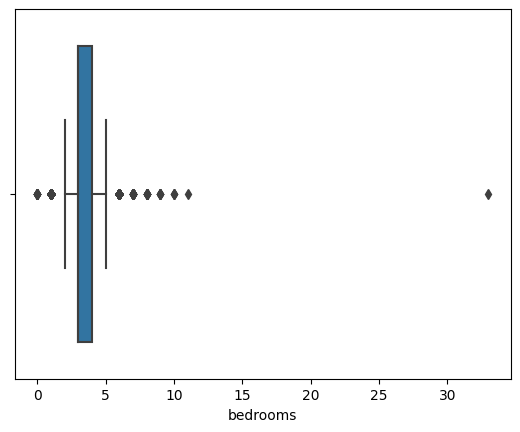

In [6]:
sns.boxplot(x="bedrooms", data=kc_house)

In [7]:
kc_house.drop(kc_house[kc_house['bedrooms'] >= 30].index, inplace = True)

<Axes: xlabel='bathrooms'>

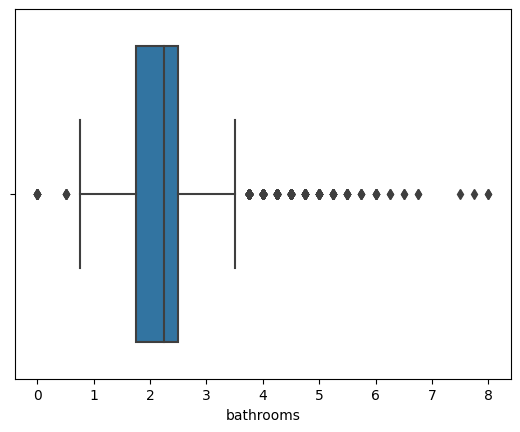

In [8]:
sns.boxplot(x="bathrooms", data=kc_house)

<Axes: xlabel='sqft_living'>

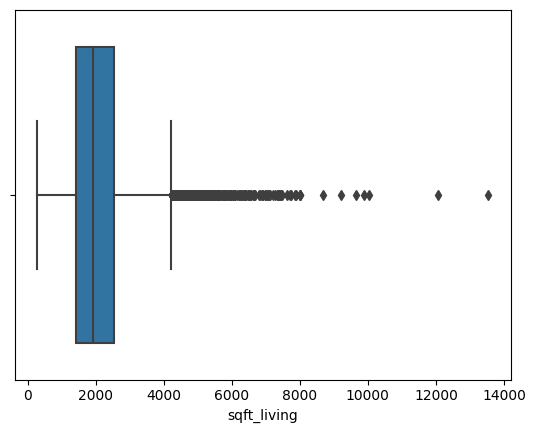

In [9]:
sns.boxplot(x="sqft_living", data=kc_house)

In [10]:
kc_house.drop(kc_house[kc_house['sqft_living'] >= 12000].index, inplace = True)

<Axes: xlabel='sqft_lot'>

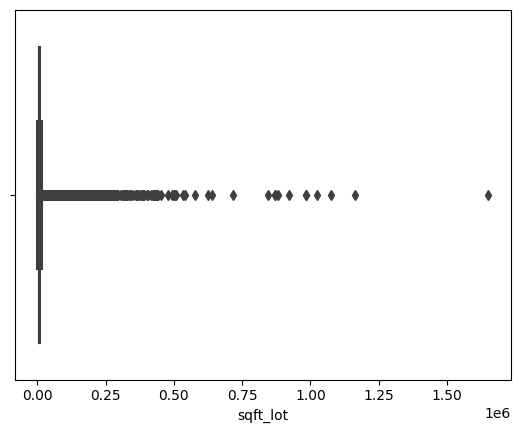

In [11]:
sns.boxplot(x="sqft_lot", data=kc_house)

In [12]:
kc_house.drop(kc_house[kc_house['sqft_lot'] >= (1.25*1e6)].index, inplace = True)

<Axes: xlabel='floors'>

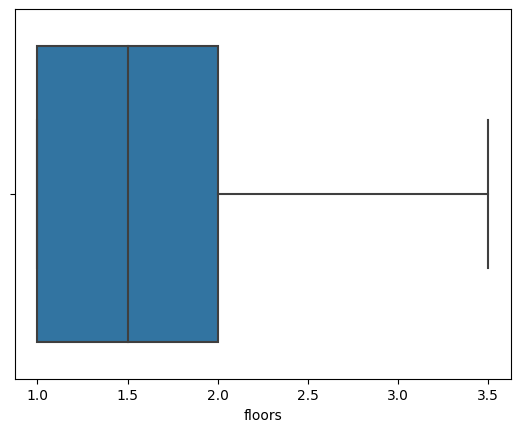

In [13]:
sns.boxplot(x="floors", data=kc_house)

<Axes: xlabel='waterfront'>

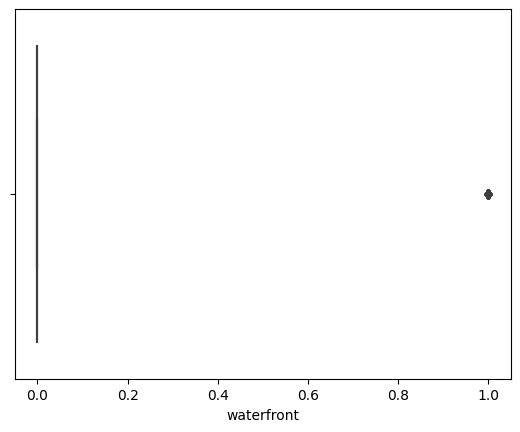

In [14]:
sns.boxplot(x="waterfront", data=kc_house)

<Axes: xlabel='view'>

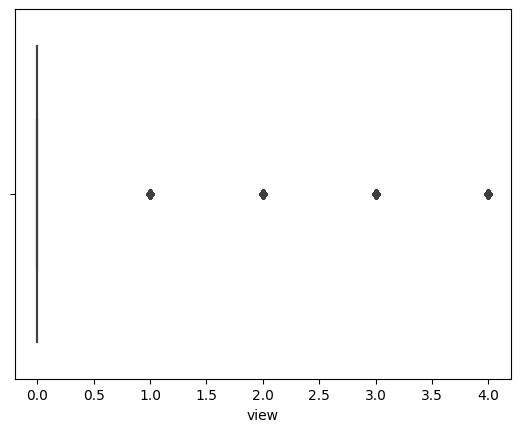

In [15]:
sns.boxplot(x="view", data=kc_house)

<Axes: xlabel='condition'>

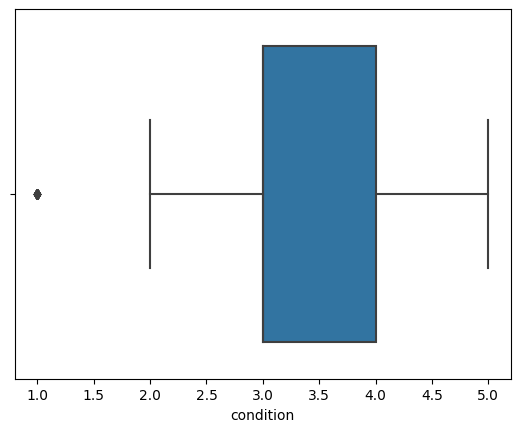

In [16]:
sns.boxplot(x="condition", data=kc_house)

<Axes: xlabel='grade'>

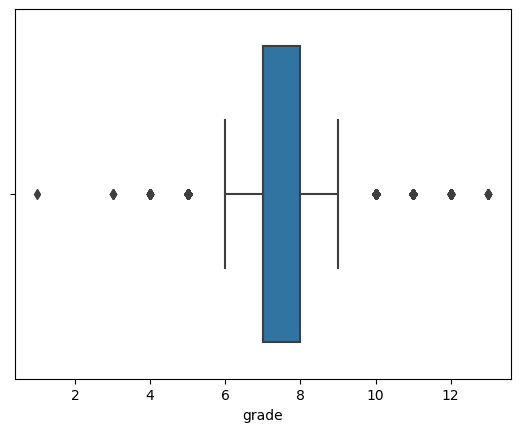

In [17]:
sns.boxplot(x="grade", data=kc_house)      

<Axes: xlabel='sqft_above'>

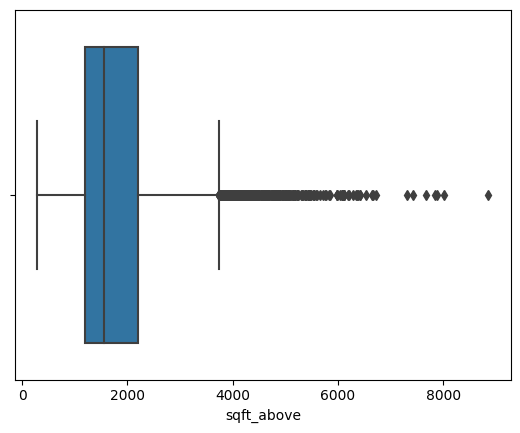

In [18]:
sns.boxplot(x="sqft_above", data=kc_house)      

In [19]:
kc_house.drop(kc_house[kc_house['sqft_above'] >= 7000].index, inplace = True)

<Axes: xlabel='sqft_basement'>

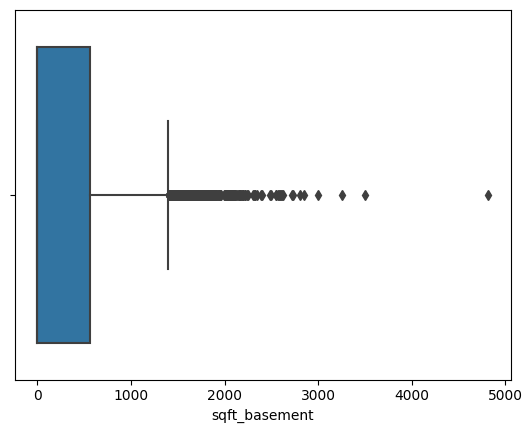

In [20]:
sns.boxplot(x="sqft_basement", data=kc_house)      

In [21]:
kc_house.drop(kc_house[kc_house['sqft_basement'] >= 4000].index, inplace = True)

<Axes: xlabel='bathrooms'>

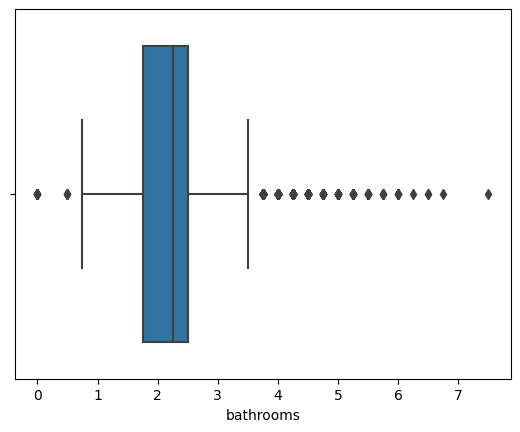

In [22]:
sns.boxplot(x="bathrooms", data=kc_house)

In [23]:
kc_house.drop(kc_house[kc_house['bathrooms'] >= 6].index, inplace = True)

<Axes: xlabel='sqft_living'>

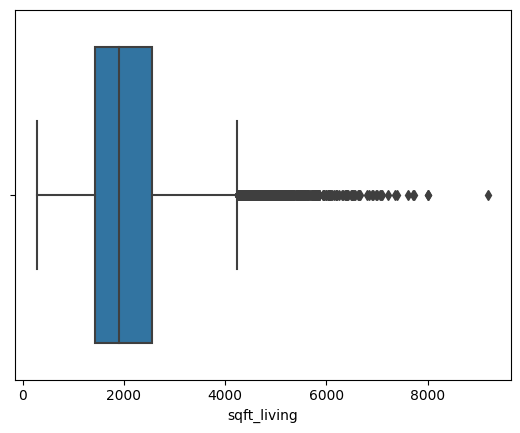

In [24]:
sns.boxplot(x="sqft_living", data=kc_house)

In [25]:
kc_house.drop(kc_house[kc_house['sqft_living'] >= 7000].index, inplace = True)

<Axes: xlabel='sqft_basement'>

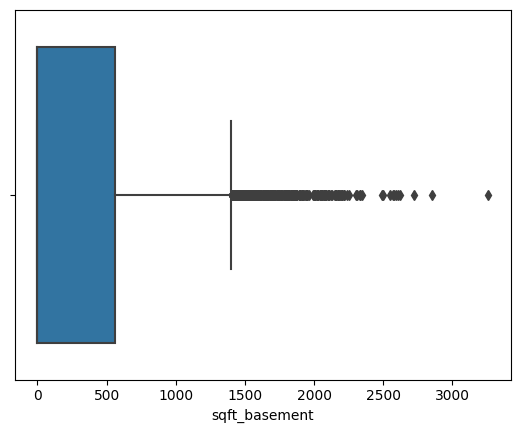

In [26]:
sns.boxplot(x="sqft_basement", data=kc_house)

In [27]:
kc_house.drop(kc_house[kc_house['sqft_basement'] >= 3000].index, inplace = True)

<Axes: xlabel='long'>

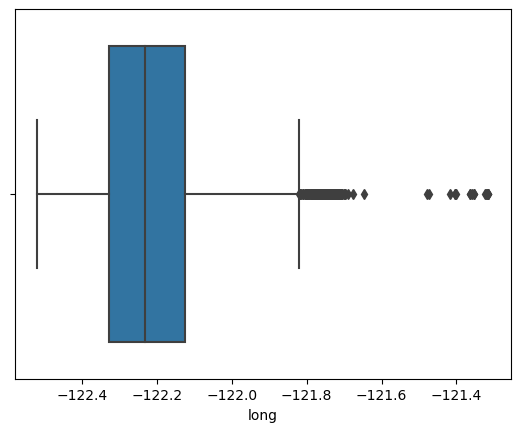

In [28]:
sns.boxplot(x="long", data=kc_house)

In [29]:
kc_house.drop(kc_house[kc_house['long'] >= -121.6].index, inplace = True)

<Axes: xlabel='sqft_living15'>

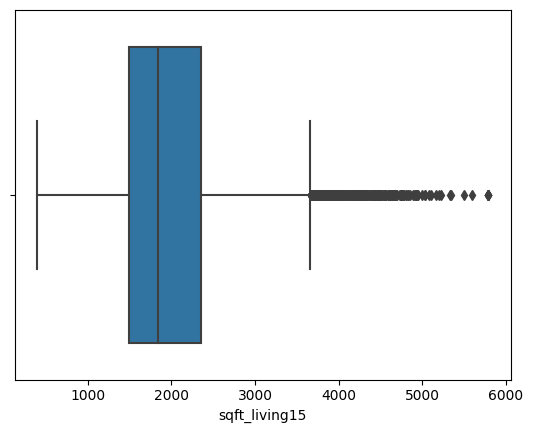

In [30]:
sns.boxplot(x="sqft_living15", data=kc_house)

In [31]:
kc_house.drop(kc_house[kc_house['sqft_living15'] >= 6000].index, inplace = True)

<Axes: xlabel='sqft_lot15'>

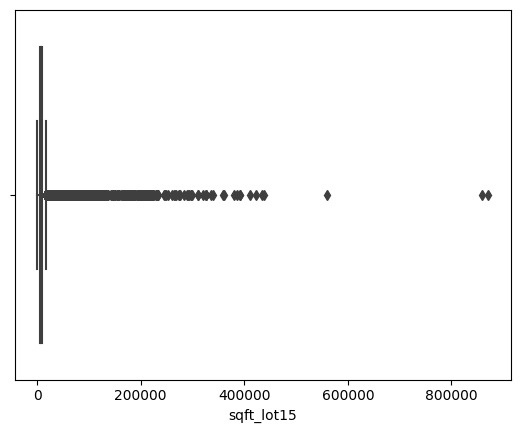

In [32]:
sns.boxplot(x="sqft_lot15", data=kc_house)

In [33]:
kc_house.drop(kc_house[kc_house['sqft_lot15'] >= 100000].index, inplace = True)

2. Evaluate the model using techniques covered in class and explain the results. How do you know this is the best model you can build, given the tools you have?

## Regression Model

In-order to use those categorical value for programming efficiently, we create the dummy variables. 

In [34]:
# Data transform yr_renovated to dummy variables

kc_house['new_renovated'] = kc_house['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)
dummies_renovated = pd.get_dummies(kc_house.new_renovated, dtype=int)
kc_house.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,new_renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1


In [35]:
dummies_renovated.rename(columns = {0:'renovated', 1:'non_renovated'}, inplace = True)
dummies_renovated.head()

,renovated,non_renovated
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


In [36]:
kc_house = kc_house.drop({'new_renovated'}, axis=1)
kc_house.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [37]:
kc_house = pd.concat([kc_house,dummies_renovated], axis=1)
kc_house.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,non_renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,1,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,0,1


Drawing a correlation matrix to determine which variables correlate to price more, and select them in the linear regression model.

                     id      date     price  bedrooms  bathrooms  sqft_living  \
id             1.000000  0.006657 -0.017119  0.001595   0.010027    -0.004336   
date           0.006657  1.000000 -0.003724 -0.014024  -0.034910    -0.034806   
price         -0.017119 -0.003724  1.000000  0.311842   0.508406     0.687590   
bedrooms       0.001595 -0.014024  0.311842  1.000000   0.523815     0.597845   
bathrooms      0.010027 -0.034910  0.508406  0.523815   1.000000     0.745373   
sqft_living   -0.004336 -0.034806  0.687590  0.597845   0.745373     1.000000   
sqft_lot      -0.102878 -0.004395  0.087642  0.053360   0.078087     0.162910   
floors         0.019589 -0.022366  0.259725  0.177331   0.503358     0.353716   
waterfront    -0.001680  0.000759  0.256348 -0.011076   0.056908     0.092125   
view           0.017085 -0.003811  0.402620  0.077133   0.177665     0.274695   
condition     -0.025355 -0.051499  0.044366  0.025109  -0.124046    -0.054998   
grade          0.011660 -0.0

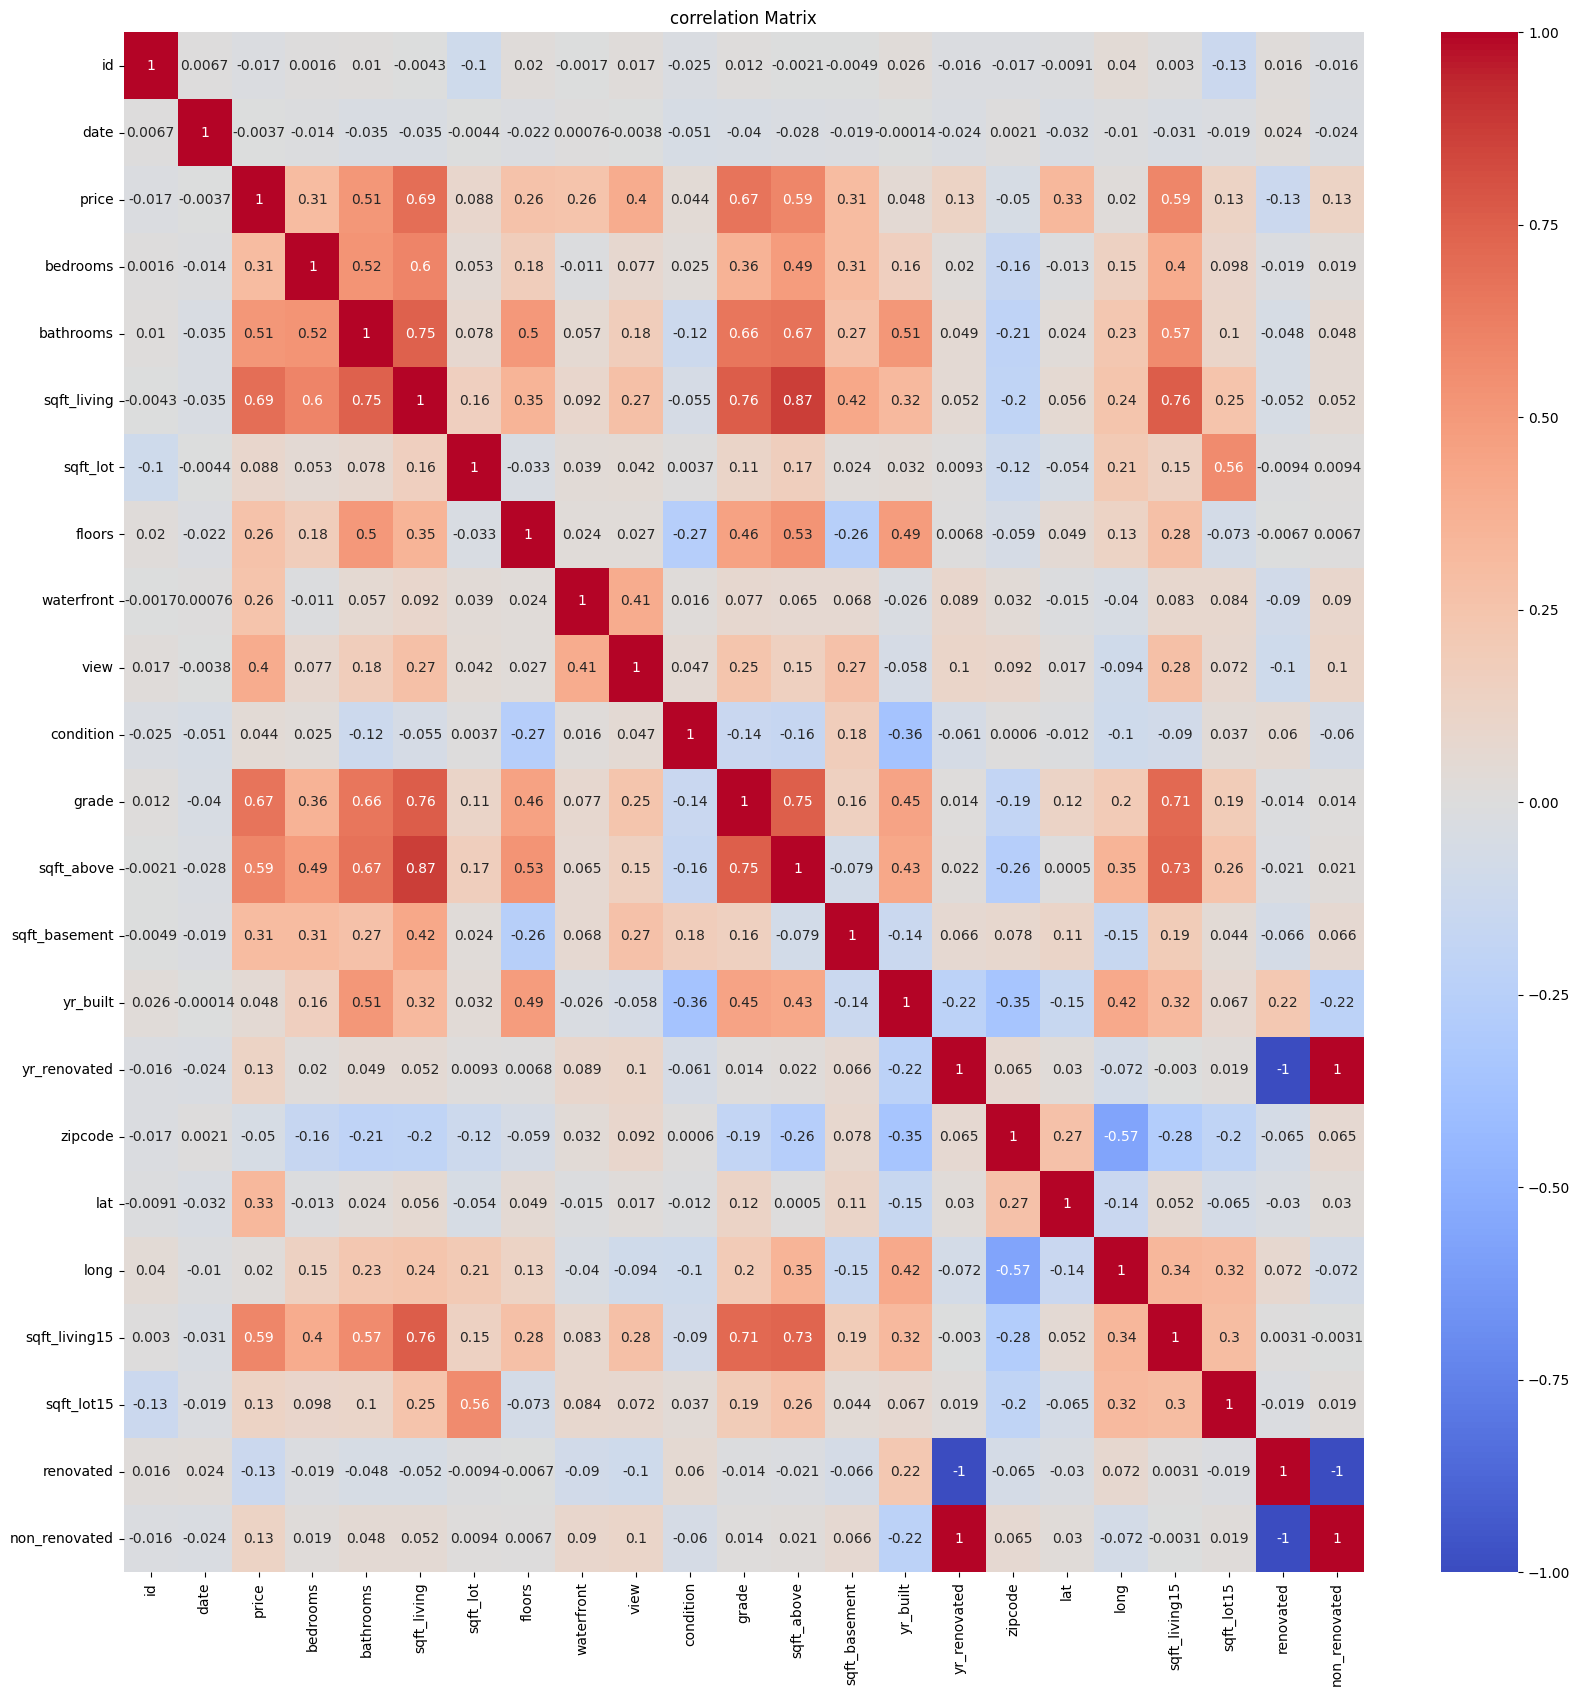

In [38]:
column_names=kc_house.columns.tolist()
correlation_matrix = kc_house.corr()

print(correlation_matrix)

plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title("correlation Matrix")
plt.show()

In [39]:
results = ols("price ~  bedrooms + bathrooms + sqft_living + floors + waterfront + view + grade + sqft_above + sqft_basement + lat + sqft_living15 ", data=kc_house).fit()
print(results.summary2())

                           Results: Ordinary least squares
Model:                    OLS                    Adj. R-squared:           0.659      
Dependent Variable:       price                  AIC:                      578518.8877
Date:                     2023-07-12 17:50       BIC:                      578606.4785
No. Observations:         21222                  Log-Likelihood:           -2.8925e+05
Df Model:                 10                     F-statistic:              4107.      
Df Residuals:             21211                  Prob (F-statistic):       0.00       
R-squared:                0.659                  Scale:                    4.0394e+10 
--------------------------------------------------------------------------------------
                  Coef.        Std.Err.     t     P>|t|      [0.025         0.975]    
--------------------------------------------------------------------------------------
Intercept     -32395903.6788 486543.7527 -66.5837 0.0000 -33349566.3298

A p-value less than 0.05 is typically considered to be statistically significant, in which case the null hypothesis should be rejected. Thus, variables with a p-value less than 0.05 are selected in the linear regression model.

In [40]:
results = ols("price ~  bedrooms + sqft_living + floors + waterfront + view + grade + sqft_above + sqft_basement + lat + sqft_living15 ", data=kc_house).fit()
print(results.summary2())

                           Results: Ordinary least squares
Model:                    OLS                    Adj. R-squared:           0.659      
Dependent Variable:       price                  AIC:                      578521.7096
Date:                     2023-07-12 17:50       BIC:                      578601.3376
No. Observations:         21222                  Log-Likelihood:           -2.8925e+05
Df Model:                 9                      F-statistic:              4562.      
Df Residuals:             21212                  Prob (F-statistic):       0.00       
R-squared:                0.659                  Scale:                    4.0401e+10 
--------------------------------------------------------------------------------------
                  Coef.        Std.Err.     t     P>|t|      [0.025         0.975]    
--------------------------------------------------------------------------------------
Intercept     -32469375.4178 485435.1737 -66.8872 0.0000 -33420865.1674

Logarithmic transformation is a useful method for converting a heavily skewed variable into a dataset with a more normalized distribution. Using logarithmic transformation to convert some variables to perform normal distribution.

In [41]:
def safe_log(x):
    return np.log(x) if x > 0 else 0

kc_house['log_sqft_living'] = kc_house['sqft_living'].apply(safe_log)
kc_house['log_sqft_living15'] = kc_house['sqft_living15'].apply(safe_log)
kc_house['log_sqft_above'] = kc_house['sqft_above'].apply(safe_log)
kc_house['log_sqft_basement'] = kc_house['sqft_basement'].apply(safe_log)
kc_house['log_price'] = kc_house['price'].apply(safe_log)



In [42]:
results = ols("log_price ~  bedrooms + log_sqft_living + floors + waterfront + view + grade + log_sqft_above + log_sqft_basement + lat + log_sqft_living15 ", data=kc_house).fit()
print(results.summary2())

                   Results: Ordinary least squares
Model:               OLS               Adj. R-squared:      0.732    
Dependent Variable:  log_price         AIC:                 4684.5304
Date:                2023-07-12 17:50  BIC:                 4772.1211
No. Observations:    21222             Log-Likelihood:      -2331.3  
Df Model:            10                F-statistic:         5798.    
Df Residuals:        21211             Prob (F-statistic):  0.00     
R-squared:           0.732             Scale:               0.072974 
---------------------------------------------------------------------
                   Coef.   Std.Err.    t     P>|t|   [0.025   0.975] 
---------------------------------------------------------------------
Intercept         -64.2261   0.6619 -97.0261 0.0000 -65.5236 -62.9286
bedrooms           -0.0091   0.0027  -3.3075 0.0009  -0.0144  -0.0037
log_sqft_living     0.1593   0.0225   7.0891 0.0000   0.1153   0.2034
floors              0.0047   0.0044   1

In [43]:
# Make predictions for the data values and determine the corresponding labels using the trained model.
pred_vals = results.predict(kc_house[['bedrooms', 'log_sqft_living' , 'floors' , 'waterfront' , 'view' , 'grade' , 'log_sqft_above' , 'log_sqft_basement' , 'lat' , 'log_sqft_living15']])

In [44]:
pred_vals

0        12.602614
1        13.344386
2        12.773416
3        12.807093
4        13.085699
           ...    
21608    13.157544
21609    13.043131
21610    12.641666
21611    12.906195
21612    12.641212
Length: 21222, dtype: float64

In [45]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),kc_house['log_price']], axis=1)

In [46]:
res

,y_hat,log_price
0,12.602614,12.309982
1,13.344386,13.195614
2,12.773416,12.100712
3,12.807093,13.311329
4,13.085699,13.142166
...,...,...
21608,13.157544,12.793859
21609,13.043131,12.899220
21610,12.641666,12.904459
21611,12.906195,12.899220


In [47]:
res['error'] = res['y_hat'] - res['log_price']

In [48]:
res.head(1)

,y_hat,log_price,error
0,12.602614,12.309982,0.292632


In [49]:
# Calculate the Mean squared error (MSE)
res['sq_error'] = res['error']**2

In [50]:
np.sqrt(res['sq_error'].mean())

0.2700664631178007

In [51]:
kc_house.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,renovated,non_renovated,log_sqft_living,log_sqft_living15,log_sqft_above,log_sqft_basement,log_price
count,2.122200e+04,21222,2.122200e+04,21222.000000,21222.000000,21222.000000,2.122200e+04,21222.000000,21222.000000,21222.000000,...,21222.000000,21222.000000,21222.000000,21222.000000,21222.000000,21222.000000,21222.000000,21222.000000,21222.000000,21222.000000
mean,4.619680e+09,2014-10-29 02:38:26.361323008,5.348095e+05,3.368391,2.105798,2061.268071,1.198884e+04,1.492696,0.007304,0.227311,...,-122.217478,1976.873527,9858.879041,0.957921,0.042079,7.544325,7.535290,7.388128,2.535232,13.042861
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,-122.514000,460.000000,651.000000,0.000000,0.000000,5.669881,6.131226,5.669881,0.000000,11.225243
25%,2.143701e+09,2014-07-22 00:00:00,3.200000e+05,3.000000,1.500000,1420.000000,5.002000e+03,1.000000,0.000000,0.000000,...,-122.329000,1480.000000,5080.000000,1.000000,0.000000,7.258412,7.299797,7.081709,0.000000,12.676076
50%,3.972900e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1900.000000,7.540000e+03,1.500000,0.000000,0.000000,...,-122.235000,1830.000000,7560.000000,1.000000,0.000000,7.549609,7.512071,7.346010,0.000000,13.017003
75%,7.340601e+09,2015-02-17 00:00:00,6.400000e+05,4.000000,2.500000,2530.000000,1.038350e+04,2.000000,0.000000,0.000000,...,-122.130000,2350.000000,9919.500000,1.000000,0.000000,7.835975,7.762171,7.691657,6.327937,13.369223
max,9.900000e+09,2015-05-27 00:00:00,4.500000e+06,11.000000,5.750000,6980.000000,1.164794e+06,3.500000,1.000000,4.000000,...,-121.646000,5790.000000,99316.000000,1.000000,1.000000,8.850804,8.663888,8.800867,7.955074,15.319588
std,2.873868e+09,NaN,3.443050e+05,0.904411,0.754638,878.853033,2.705153e+04,0.540516,0.085151,0.753780,...,0.136427,676.514281,10498.574788,0.200774,0.200774,0.419498,0.325374,0.422354,3.168558,0.521830


(array([3.600e+01, 2.500e+02, 1.199e+03, 3.930e+03, 8.326e+03, 5.752e+03,
        1.518e+03, 1.840e+02, 2.200e+01, 5.000e+00]),
 array([-1.18460924, -0.9272837 , -0.66995816, -0.41263262, -0.15530708,
         0.10201846,  0.359344  ,  0.61666954,  0.87399508,  1.13132062,
         1.38864615]),
 <BarContainer object of 10 artists>)

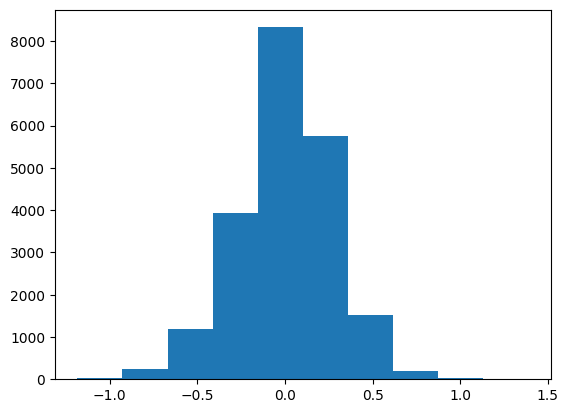

In [52]:
plt.hist(res['error'])

(array([  51.,  314., 2242., 5492., 6544., 4394., 1476.,  524.,  150.,
          35.]),
 array([11.22524339, 11.63467785, 12.0441123 , 12.45354676, 12.86298122,
        13.27241567, 13.68185013, 14.09128459, 14.50071904, 14.9101535 ,
        15.31958795]),
 <BarContainer object of 10 artists>)

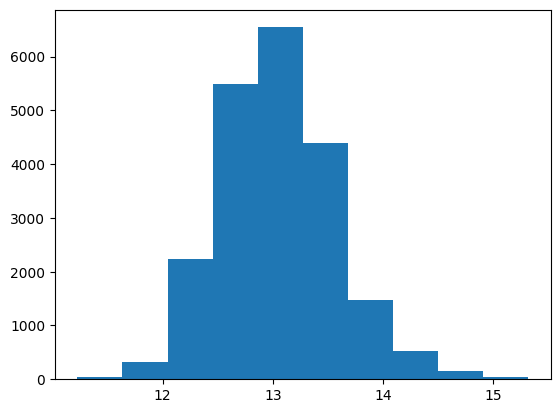

In [53]:
plt.hist(kc_house['log_price'])

In [54]:
kc_house.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,renovated,non_renovated,log_sqft_living,log_sqft_living15,log_sqft_above,log_sqft_basement,log_price
count,2.122200e+04,21222,2.122200e+04,21222.000000,21222.000000,21222.000000,2.122200e+04,21222.000000,21222.000000,21222.000000,...,21222.000000,21222.000000,21222.000000,21222.000000,21222.000000,21222.000000,21222.000000,21222.000000,21222.000000,21222.000000
mean,4.619680e+09,2014-10-29 02:38:26.361323008,5.348095e+05,3.368391,2.105798,2061.268071,1.198884e+04,1.492696,0.007304,0.227311,...,-122.217478,1976.873527,9858.879041,0.957921,0.042079,7.544325,7.535290,7.388128,2.535232,13.042861
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,-122.514000,460.000000,651.000000,0.000000,0.000000,5.669881,6.131226,5.669881,0.000000,11.225243
25%,2.143701e+09,2014-07-22 00:00:00,3.200000e+05,3.000000,1.500000,1420.000000,5.002000e+03,1.000000,0.000000,0.000000,...,-122.329000,1480.000000,5080.000000,1.000000,0.000000,7.258412,7.299797,7.081709,0.000000,12.676076
50%,3.972900e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1900.000000,7.540000e+03,1.500000,0.000000,0.000000,...,-122.235000,1830.000000,7560.000000,1.000000,0.000000,7.549609,7.512071,7.346010,0.000000,13.017003
75%,7.340601e+09,2015-02-17 00:00:00,6.400000e+05,4.000000,2.500000,2530.000000,1.038350e+04,2.000000,0.000000,0.000000,...,-122.130000,2350.000000,9919.500000,1.000000,0.000000,7.835975,7.762171,7.691657,6.327937,13.369223
max,9.900000e+09,2015-05-27 00:00:00,4.500000e+06,11.000000,5.750000,6980.000000,1.164794e+06,3.500000,1.000000,4.000000,...,-121.646000,5790.000000,99316.000000,1.000000,1.000000,8.850804,8.663888,8.800867,7.955074,15.319588
std,2.873868e+09,NaN,3.443050e+05,0.904411,0.754638,878.853033,2.705153e+04,0.540516,0.085151,0.753780,...,0.136427,676.514281,10498.574788,0.200774,0.200774,0.419498,0.325374,0.422354,3.168558,0.521830


((array([-3.99271018, -3.77726634, -3.65940722, ...,  3.65940722,
          3.77726634,  3.99271018]),
  array([-1.18460924, -1.12829994, -1.08782522, ...,  1.19962012,
          1.25408113,  1.38864615])),
 (0.26929287343067393, -7.746589040780824e-14, 0.9969550946296237))

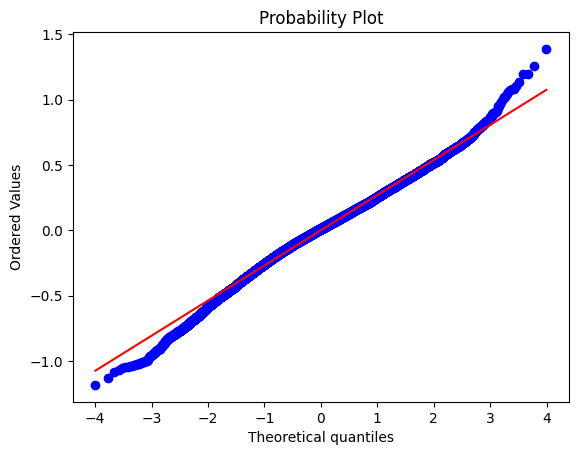

In [55]:
# Produces a probability plot that compares the quantiles of a specific theoretical distribution to the sample data.
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [56]:
# Calculate influence and outlier measures
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_bedrooms  dfb_log_sqft_living  dfb_floors  \
0          -0.002354     -0.003170             0.002452    0.007353   
1           0.004905      0.005524             0.005354   -0.002530   
2           0.024572     -0.002025             0.017601   -0.005755   
3           0.006134      0.006987             0.025346    0.000500   
4          -0.000716     -0.000311            -0.000145   -0.002270   
...              ...           ...                  ...         ...   
21608       0.006142     -0.001368            -0.005384   -0.028807   
21609      -0.000933     -0.001607            -0.001123   -0.001664   
21610       0.000043     -0.004272             0.002497    0.008508   
21611      -0.000064      0.000017            -0.000062   -0.000123   
21612       0.000011     -0.000819             0.000479    0.001631   

       dfb_waterfront  dfb_view  dfb_grade  dfb_log_sqft_above  \
0           -0.000049 -0.000412  -0.005390           -0.001139   
1           -0.

In [57]:
infl.summary_frame()

,dfb_Intercept,dfb_bedrooms,dfb_log_sqft_living,dfb_floors,dfb_waterfront,dfb_view,dfb_grade,dfb_log_sqft_above,dfb_log_sqft_basement,dfb_lat,dfb_log_sqft_living15,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.002354,-0.003170,0.002452,0.007353,-0.000049,-0.000412,-0.005390,-0.001139,0.001776,0.001637,0.004662,2.080790e-05,-1.083380,0.000195,-0.015129,-1.083384,-0.015129
1,0.004905,0.005524,0.005354,-0.002530,-0.000035,0.001359,0.008541,-0.009398,-0.009742,-0.004556,0.002730,2.243801e-05,-0.550952,0.000812,-0.015710,-0.550943,-0.015710
2,0.024572,-0.002025,0.017601,-0.005755,-0.001799,0.004617,0.018959,0.003642,0.000547,-0.023004,-0.072922,6.926176e-04,-2.491763,0.001226,-0.087286,-2.492070,-0.087296
3,0.006134,0.006987,0.025346,0.000500,0.001041,-0.003664,0.004866,-0.025333,-0.017033,-0.005074,-0.013766,1.424299e-04,1.867018,0.000449,0.039582,1.867128,0.039584
4,-0.000716,-0.000311,-0.000145,-0.002270,0.000038,-0.000320,0.001269,0.000293,-0.000569,0.000746,-0.000619,9.079357e-07,0.209055,0.000228,0.003160,0.209051,0.003160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.006142,-0.001368,-0.005384,-0.028807,0.000182,-0.000036,-0.002788,0.009966,0.006492,-0.007166,0.002097,1.079417e-04,-1.346742,0.000654,-0.034458,-1.346767,-0.034459
21609,-0.000933,-0.001607,-0.001123,-0.001664,-0.000005,0.000401,0.000090,0.000399,0.001659,0.000891,0.002400,4.077097e-06,-0.532779,0.000158,-0.006697,-0.532770,-0.006697
21610,0.000043,-0.004272,0.002497,0.008508,-0.000547,0.001402,0.004313,-0.003611,-0.003191,0.001023,-0.008813,3.384435e-05,0.973004,0.000393,0.019295,0.973003,0.019295
21611,-0.000064,0.000017,-0.000062,-0.000123,0.000006,0.000007,-0.000164,0.000074,0.000094,0.000046,0.000199,1.275851e-08,-0.025822,0.000210,-0.000375,-0.025821,-0.000375


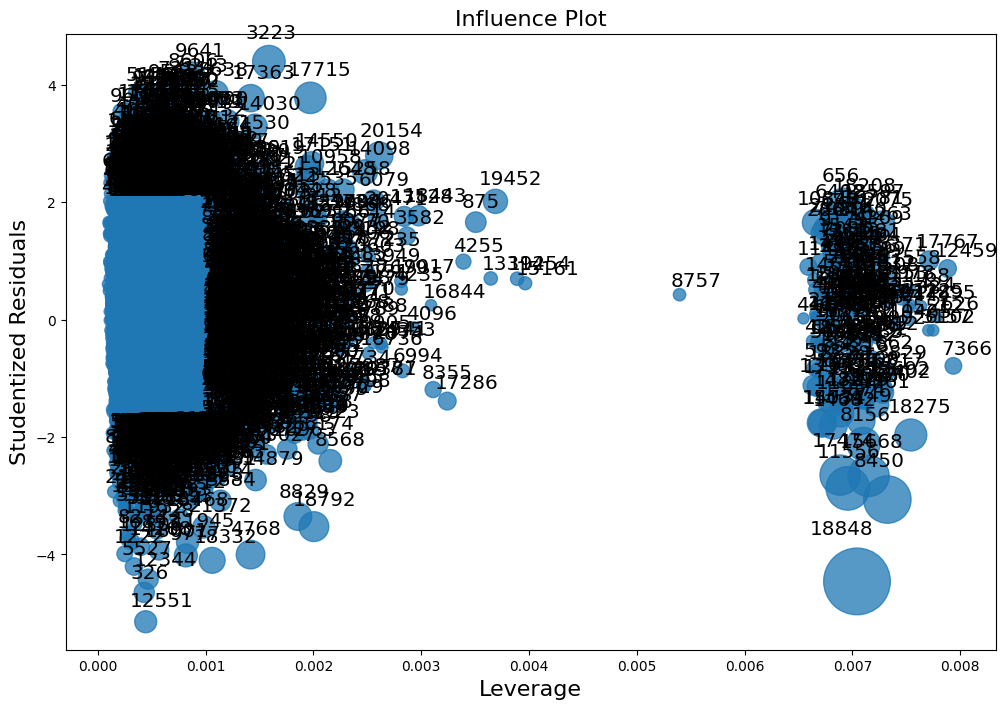

In [58]:
# Draw an influence plots to identify influential data points
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [111]:

indexes_to_extract = [1060, 19236, 19258, 19604, 19616,260,449]
new_df = kc_house.loc[indexes_to_extract]
new_df.sort_values('price')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
19616,1446400564,20140507T000000,185000.0,4,1.00,1490,6600,1.0,0,0,...,7,1490,0,1969,98168,47.4835,-122.332,1280,6600,0
1060,1795500240,20140623T000000,249500.0,2,1.75,1500,8645,1.0,0,0,...,7,1500,0,1963,98042,47.3643,-122.115,1220,8645,0
449,4140090240,20141105T000000,520000.0,3,2.25,2590,9263,1.0,0,0,...,8,1440,1150,1977,98028,47.7691,-122.262,2580,9450,0
19604,7518504130,20140626T000000,663000.0,3,2.00,1480,3876,1.0,0,0,...,7,860,620,1928,98117,47.6808,-122.382,1660,3774,0
260,8722101360,20141202T000000,780000.0,3,1.00,1660,4400,1.5,0,0,...,8,1460,200,1911,98112,47.6362,-122.302,1660,4400,0
19258,6710100131,20150410T000000,981000.0,3,3.25,2730,9588,2.0,0,1,...,10,1900,830,1984,98052,47.6339,-122.090,2730,12736,0
19236,2525049086,20141003T000000,2720000.0,4,3.25,3990,18115,2.0,0,0,...,11,3990,0,1989,98039,47.6177,-122.229,3450,16087,0


As we can see from the above diagram which contains the influential data points on the right side of the influence plot, they are strongly correlated on the variables of bathrooms, sqft_living and sqft_lot with the response variable 'price'. As the increase of bathrooms, sqft_living and sqft_lot increase, the price increases. Thus, we can conclude that the number of bathrooms, the size of the living area in square feet and the size of the lot in square feet are the main contributors to the sale price.

In [59]:
# Remove the data points with large leverage( > 0.04 ) in kc_house data frame

leverage_threshold = 0.04
leverage_values = infl.hat_matrix_diag
high_leverage_indexes = np.where(leverage_values > leverage_threshold)[0]
high_leverage_labels = kc_house.index[high_leverage_indexes]
df_filtered = kc_house.drop(high_leverage_labels)

In [60]:
results_new = ols("log_price ~  bedrooms + log_sqft_living + floors + waterfront + view + grade + log_sqft_above + sqft_basement + lat + log_sqft_living15 ", data=df_filtered).fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     5798.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:01:12   Log-Likelihood:                -2331.3
No. Observations:               21222   AIC:                             4685.
Df Residuals:                   21211   BIC:                             4772.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -64.2261      0.66

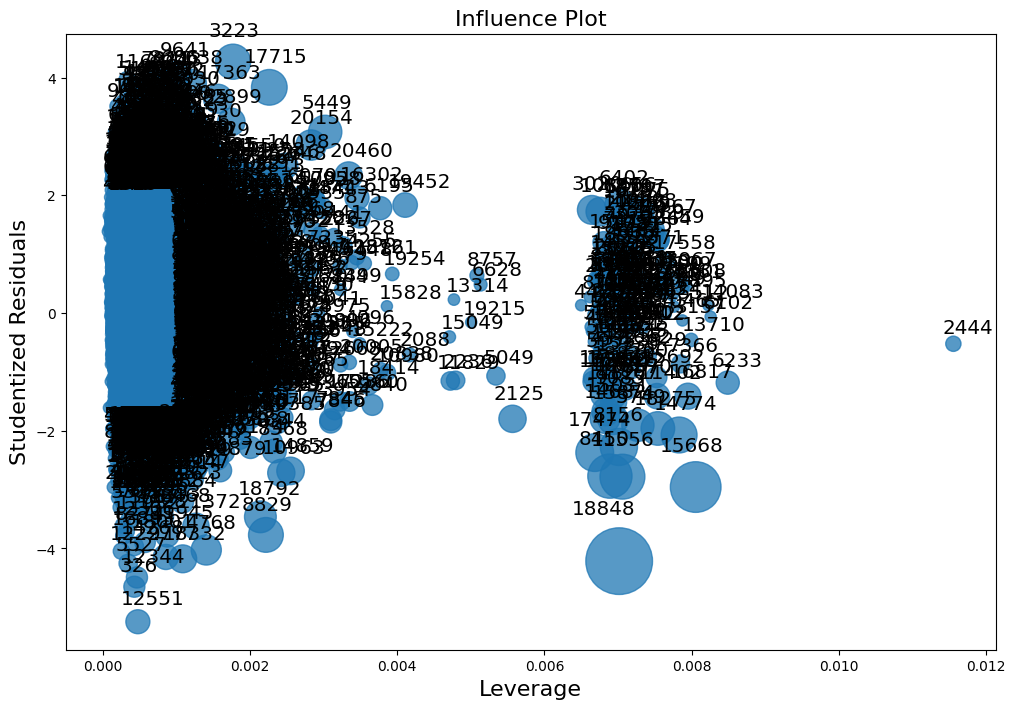

In [61]:
fig1, ax1 = plt.subplots(figsize=(12,8))
fig1 = sm.graphics.influence_plot(results_new, ax=ax1, criterion='cooks')

In [62]:
res

,y_hat,log_price,error,sq_error
0,12.602614,12.309982,0.292632,0.085633
1,13.344386,13.195614,0.148772,0.022133
2,12.773416,12.100712,0.672704,0.452530
3,12.807093,13.311329,-0.504236,0.254254
4,13.085699,13.142166,-0.056467,0.003189
...,...,...,...,...
21608,13.157544,12.793859,0.363685,0.132267
21609,13.043131,12.899220,0.143912,0.020711
21610,12.641666,12.904459,-0.262792,0.069060
21611,12.906195,12.899220,0.006975,0.000049


Comparing Ridge, Lasso & ElasticNet Regressions

In [63]:
# Import relevant libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer
import numpy as np

In [64]:
kc_house = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/kc_house_data.csv')

In [65]:
kc_house.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [66]:
# Categorize the yr_renovated variable
kc_house['renovated'] = kc_house['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)
kc_house.head(2)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1


In [67]:
kc_house = kc_house.drop('yr_renovated', axis =1)


In [68]:
kc_house.head(2)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,1


In [69]:
# Separate features and target
categorical_features = ['waterfront','renovated']
numerical_features = ['bedrooms','sqft_living','floors','view','grade','sqft_above','sqft_basement','lat','sqft_living15']
target = 'price'


In [70]:
kc_house[['bedrooms','sqft_living','floors','waterfront','view','grade','sqft_above','sqft_basement','lat','sqft_living15','renovated']]

,bedrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15,renovated
0,3,1180,1.0,0,0,7,1180,0,47.5112,1340,0
1,3,2570,2.0,0,0,7,2170,400,47.7210,1690,1
2,2,770,1.0,0,0,6,770,0,47.7379,2720,0
3,4,1960,1.0,0,0,7,1050,910,47.5208,1360,0
4,3,1680,1.0,0,0,8,1680,0,47.6168,1800,0
...,...,...,...,...,...,...,...,...,...,...,...
21608,3,1530,3.0,0,0,8,1530,0,47.6993,1530,0
21609,4,2310,2.0,0,0,8,2310,0,47.5107,1830,0
21610,2,1020,2.0,0,0,7,1020,0,47.5944,1020,0
21611,3,1600,2.0,0,0,8,1600,0,47.5345,1410,0


In [71]:
# Split data in train / test
X_train, X_test, y_train, y_test = train_test_split(kc_house[categorical_features + numerical_features]
                                                    ,kc_house[target],
                                                    test_size = 0.3, random_state=1234)

In [72]:
# Define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [73]:
# Building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [74]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [75]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'renovated']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'sqft_living',
                                                   'floors', 'view', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'lat',
                                                   'sqft_living15'])])),
                ('regressor', LinearRegression())])

In [76]:
pred = linear_regression.predict(X_test)

In [77]:
pred

array([535016., 475192., 967944., ..., 484144., 604120., 483072.])

In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
np.sqrt(mean_squared_error(pred,y_test))

208173.67662395898

In [80]:
# Develop ridge regression
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [81]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'renovated']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'sqft_living',
                                                   'floors', 'view', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'lat',
                                                   'sqft_living15'])])),
                ('regressor', Ridge(alpha=3.0))])

In [82]:
pred_ridge = ridge_regression.predict(X_test)

In [83]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

208235.08558536222

In [84]:
# Develop Lasso regression
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [85]:
lasso_regression.fit(X_train, y_train)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.213e+13, tolerance: 2.071e+11
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'renovated']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'sqft_living',
                                                   'floors', 'view', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'lat',
                                                   'sqft_living15'])])),
                ('regressor', Lasso())])

In [86]:
lasso_pred = lasso_regression.predict(X_test)

In [87]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

208246.32855837973

In [88]:
# Develop elasticnet regression
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [89]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'renovated']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'sqft_living',
                                                   'floors', 'view', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'lat',
                                                   'sqft_living15'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [90]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [91]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

214970.06975224128

In [92]:
elastic_net_pred = pd.concat([pd.DataFrame(elasticnet_pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)

In [93]:
elastic_net_pred['res'] = elastic_net_pred['pred'] - elastic_net_pred['price']

After evaluate the model and comparing the Root Mean Square Error (RMSE) of Ridge, Lasso & ElasticNet models, we find that Ridge regression is the best model, since its Root Mean Square Error (RMSE) is the smallest.

3. Explain the results to a business executive. What are the main drivers of house prices in King City? And how much do these drivers impact the price?

The results of the linear regression model provide valuable insights into the main drivers of house prices in King City and their impact on the price. The model includes several key factors that significantly influence house prices in this area.

The number of bedrooms, size of the living area (sqft_living), and the number of floors are strong drivers of house prices. Houses with more bedrooms and larger living areas tend to command higher prices as they provide more space and accommodation. Additionally, houses with multiple floors are valued higher due to the increased living area and architectural features they offer.

The presence of a waterfront view and the quality of the view also play significant roles in determining house prices. Properties with waterfront views or attractive views, such as mountains or cityscapes, tend to have higher prices. These views are highly desirable and contribute to the overall value and desirability of the property.

The grade of a house, which reflects its construction quality and the materials used, is another important driver. Higher-grade houses, constructed with superior materials and craftsmanship, have higher prices. The quality of construction materials and workmanship adds value and appeals to potential buyers.

These drivers impact the price to varying degrees. The coefficients obtained from the linear regression model provide estimates of the magnitude of their impact. For example, an increase in the number of bedrooms or living area can significantly raise the price of a house. Similarly, a waterfront view or higher-grade construction can have a substantial positive effect on the price. However, it's important to consider that the magnitude of the impact may vary based on market conditions, location, and other factors.

Understanding these main drivers of house prices in King City can be instrumental in assessing property values, identifying investment opportunities, and making informed decisions in the real estate market.
